<div class="alert alert-info">
    <center> 
        <h1> Players stats </h1> 
    </center>
</div>

<h1> Libraries </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from IPython.display import display

import widgets_definition as wd
import operations as op

<h1> Files </h1>

In [2]:
regular_season = pd.read_csv("Data_regular_season.csv")
regular_season = regular_season.set_index('Player')
playoffs = pd.read_csv("Data_playoffs.csv")
playoffs = playoffs.set_index('Player')

playoffs.head(5)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
LeBron,7631,1919,2391,454,252,3
MJ,5987,1022,1152,376,158,2
Kareem,5762,767,2481,189,476,5
Kobe,5640,1040,1119,310,144,2
Karl_Malone,4761,610,2062,258,135,4


<h2> Totals : </h2>

In [3]:
globals()["totals"] = regular_season + playoffs
totals["Primary Position"] = np.int64(totals["Primary Position"]*0.5)
totals.head()

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
LeBron,42998,11615,12142,2517,1234,3
MJ,38279,6655,7824,2320,1051,2
Kareem,44149,6427,19921,1349,3665,5
Kobe,39283,7346,8166,2254,784,2
Karl_Malone,41689,5858,17030,2343,1280,4


<div class="alert alert-info"> 
    <center> <h2> Heatmap </h2> </center> 
</div>

In [4]:
heatmap_button, heatmap_show_annotations, heatmap_width, heatmap_height, heatmap_output = wd.heatmap_widgets()

In [5]:
@heatmap_button.on_click
def on_click(self): 
    heatmap_output.clear_output()
    annot = heatmap_show_annotations.value
    figsize = (heatmap_width.value,heatmap_height.value)
    with heatmap_output:
        op.create_heatmap(totals, size=figsize,annotations=annot)

In [6]:
display(heatmap_show_annotations, heatmap_width, heatmap_height, heatmap_button, heatmap_output)

Checkbox(value=True, description='Show annotations')

IntSlider(value=10, description='Width', max=10, min=5)

IntSlider(value=5, description='Height', max=10, min=5)

Button(button_style='info', description='Show heatmap', style=ButtonStyle())

Output()

<h1> Stats grouped by position </h1>

<h2> Point guards </h2>

In [7]:
point_guards = totals[totals["Primary Position"]==1]
point_guards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
Magic,21408,12487,8024,2082,438,1
Stockton,22147,17645,4659,3603,365,1
Robertson,28620,10656,8382,92,8,1


<h2> Shooting guards </h2>

In [8]:
shooting_guards = totals[totals["Primary Position"] == 2]
shooting_guards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
MJ,38279,6655,7824,2320,1051,2
Kobe,39283,7346,8166,2254,784,2
Dwyane_Wade,27119,6571,5861,1893,1060,2


<h2> Small forwards </h2>

In [9]:
small_forwards = totals[totals["Primary Position"] == 3]
small_forwards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
LeBron,42998,11615,12142,2517,1234,3
Paul_Pierce,29577,5287,8512,1956,850,3
Dominique_Wikins,28091,2820,7544,1451,677,3


<h2> Power forwards </h2>

In [10]:
power_forwards = totals[totals["Primary Position"] == 4]
power_forwards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
Karl_Malone,41689,5858,17030,2343,1280,4
Duncan,31668,4989,17950,1193,3588,4
Dirk,35223,4011,12935,1359,1410,4


<h2> Centers </h2>

In [11]:
centers = totals[totals["Primary Position"] == 5]
centers.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
Kareem,44149,6427,19921,1349,3665,5
Wilt,35026,5316,27837,0,0,5
Shaq,33846,3608,15607,856,3191,5


<center class="alert alert-info">
    <h1> Stats: points </h1>
</center>

In [12]:
points_button, points_width, points_height, points_output = wd.points_widgets()

In [13]:
total_points = ()

@points_button.on_click
def on_click(self):
    points_output.clear_output()
    size=(points_width.value, points_height.value)
    with points_output:
        globals()["total_points"] = op.getTotalPoints(totals,size=size)
        op.displayPoints(totals)

In [14]:
display(points_width, points_height, points_button, points_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show total points', style=ButtonStyle())

Output()

<center class="alert alert-info">
    <h1> Stats: assists </h1>
</center>

In [15]:
assists_button, assists_width, assists_height , assists_output = wd.assists_widgets()

In [16]:
total_assists = ()

@assists_button.on_click
def on_click(self):
    assists_output.clear_output()
    size=(assists_width.value, assists_height.value)
    with assists_output:
        globals()["total_assists"] = op.getTotalAssists(totals,size=size)
        op.displayAssists(totals)

In [17]:
display(assists_width, assists_height, assists_button, assists_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show total assists', style=ButtonStyle())

Output()

<center class="alert alert-info">
    <h1> Stats: rebounds </h1>
</center>

In [18]:
rebounds_button, rebounds_width, rebounds_height, rebounds_output = wd.rebounds_widgets()

In [19]:
total_rebounds=()

@rebounds_button.on_click
def on_click(self):
    rebounds_output.clear_output()
    size=(rebounds_width.value, rebounds_height.value)
    with rebounds_output:
        globals()["total_rebounds"] = op.getTotalRebounds(totals,size=size)
        op.displayRebounds(totals)

In [21]:
display(rebounds_width,rebounds_height,rebounds_button,rebounds_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='height', max=15, min=5)

Button(button_style='info', description='Show total rebounds', style=ButtonStyle())

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 1440x360 with 1 Axes>', '…

<center class="alert alert-info">
    <h1> Stats: steals </h1>
</center>

In [22]:
steals_button, steals_width, steals_height, steals_output = wd.steals_widgets()

In [23]:
total_steals = ()

@steals_button.on_click
def on_click(self):
    steals_output.clear_output()
    size = (steals_width.value,steals_height.value)
    with steals_output:
        globals()["total_steals"] = op.getTotalSteals(totals,size)
        op.displaySteals(totals)

In [24]:
display(steals_width,steals_height,steals_button,steals_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show total steals', style=ButtonStyle())

Output()

<center class="alert alert-info">    
    <h1> Stats : blocks </h1>
</center>

In [25]:
blocks_button, blocks_width, blocks_height, blocks_output = wd.blocks_widgets()

In [26]:
total_blocks = ()

@blocks_button.on_click
def on_click(self):
    blocks_output.clear_output()
    size = (blocks_width.value,blocks_height.value)
    with blocks_output:
        globals()["total_blocks"] = op.getTotalBlocks(totals,size)
        op.displayBlocks(totals)

In [27]:
display(blocks_width,blocks_height,blocks_button,blocks_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show total blocks', style=ButtonStyle())

Output()

<center class="alert alert-info">
    <h1> Stats: totals </h1>
</center>

In [28]:
totals_button, totals_width, totals_height, totals_output = wd.totals_widgets()

In [29]:
total_totals = ()

@totals_button.on_click
def on_click(self):
    totals_output.clear_output()
    size = (totals_width.value,totals_height.value)
    with totals_output:
        globals()["total_totals"] = op.getTotalTotals(totals,size)
        op.displayTotals(total_totals)

In [30]:
display(totals_width,totals_height,totals_button,totals_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show totals', style=ButtonStyle())

Output()

<h1> Totals grouped by position </h1>

<h3 class="alert alert-info"> Totals: guards </h3>

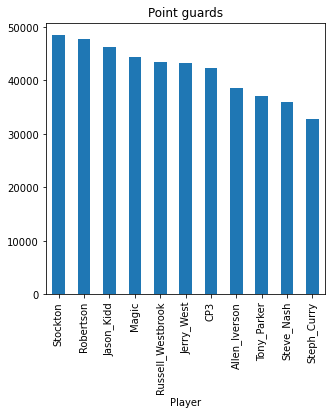

 1 - Stockton :  48420
 2 - Robertson :  47759
 3 - Jason_Kidd :  46198
 4 - Magic :  44440
 5 - Russell_Westbrook :  43421
 6 - Jerry_West :  43193
 7 - CP3 :  42321
 8 - Allen_Iverson :  38504
 9 - Tony_Parker :  37128
 10 - Steve_Nash :  36001
 11 - Steph_Curry :  32855


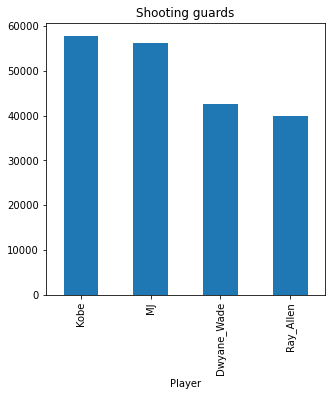

 1 - Kobe :  57835
 2 - MJ :  56131
 3 - Dwyane_Wade :  42506
 4 - Ray_Allen :  39886


In [31]:
op.TotalsByPosition_Guards(point_guards,shooting_guards)

<h2> Forwards </h2>

<h3 class="alert alert-info"> Totals: forwards </h3>

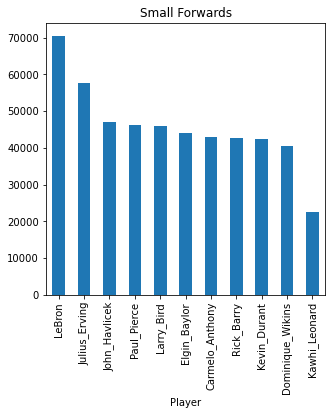

 1 - LeBron :  70509
 2 - Julius_Erving :  57555
 3 - John_Havlicek :  46975
 4 - Paul_Pierce :  46185
 5 - Larry_Bird :  45857
 6 - Elgin_Baylor :  44153
 7 - Carmelo_Anthony :  42819
 8 - Rick_Barry :  42616
 9 - Kevin_Durant :  42350
 10 - Dominique_Wikins :  40586
 11 - Kawhi_Leonard :  22469


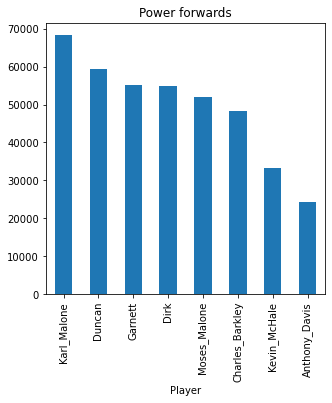

 1 - Karl_Malone :  68204
 2 - Duncan :  59392
 3 - Garnett :  55048
 4 - Dirk :  54942
 5 - Moses_Malone :  51986
 6 - Charles_Barkley :  48256
 7 - Kevin_McHale :  33220
 8 - Anthony_Davis :  24326


In [32]:
op.TotalsByPosition_Forwards(small_forwards,power_forwards)

<h2> Centers </h2>

<h3 class="alert alert-info"> Stats </h3>

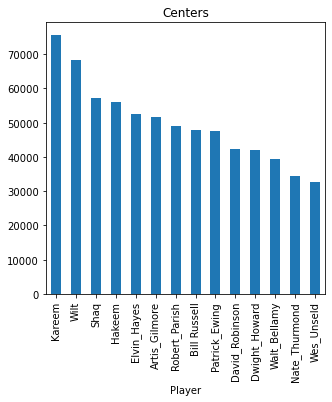

 1 - Kareem :  75516
 2 - Wilt :  68184
 3 - Shaq :  57113
 4 - Hakeem :  56063
 5 - Elvin_Hayes :  52572
 6 - Artis_Gilmore :  51647
 7 - Robert_Parish :  49087
 8 - Bill Russell :  47794
 9 - Patrick_Ewing :  47620
 10 - David_Robinson :  42340
 11 - Dwight_Howard :  42142
 12 - Walt_Bellamy :  39497
 13 - Nate_Thurmond :  34515
 14 - Wes_Unseld :  32827


In [33]:
op.TotalsByPosition_Centers(centers)

<h1> Comparing two players </h1>

In [35]:
player_one = str(input("First player's name: "))
player_two = str(input("Second player's name: "))

First player's name:  LeBron
Second player's name:  Hakeem


In [36]:
total_one = int(totals[totals.index==player_one].sum(axis=1))

In [37]:
total_two = int(totals[totals.index==player_two].sum(axis=1))

In [38]:
op.compare_players(total_one, player_one, total_two, player_two)

LeBron has a higher total
